In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline  
pd.set_option('display.max_columns', None)


In [3]:
train = pd.read_csv("../data/Train.csv")
test = pd.read_csv("../data/Test.csv")

In [4]:
train.describe(include='all')

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
count,21201,21201,21201,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,21201.000000,21201,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201,21201.000000
unique,21201,3186,1,NaN,2,NaN,NaN,15686,NaN,NaN,15742,NaN,NaN,15767,NaN,NaN,15690,NaN,NaN,15725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924,NaN
top,Order_No_16994,User_Id_393,Bike,NaN,Business,NaN,NaN,12:51:03 PM,NaN,NaN,9:56:52 AM,NaN,NaN,2:42:41 PM,NaN,NaN,2:28:10 PM,NaN,NaN,3:24:03 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rider_Id_726,NaN
freq,1,645,21201,NaN,17384,NaN,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN,6,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,NaN
mean,NaN,NaN,NaN,2.752182,NaN,15.653696,3.240083,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,15.653837,3.240225,NaN,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,NaN,1556.920947
std,NaN,NaN,NaN,0.625178,NaN,8.798916,1.567295,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,8.798886,1.567228,NaN,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,NaN,987.270788
min,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,NaN,1.000000
25%,NaN,NaN,NaN,3.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,NaN,882.000000
50%,NaN,NaN,NaN,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,NaN,1369.000000
75%,NaN,NaN,NaN,3.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,NaN,2040.000000


In [5]:
test.describe(include='all')

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
count,7068,7068,7068,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,7068.000000,7068,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068
unique,7068,1617,1,NaN,2,NaN,NaN,6336,NaN,NaN,6388,NaN,NaN,6374,NaN,NaN,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,822
top,Order_No_3760,User_Id_393,Bike,NaN,Business,NaN,NaN,11:25:46 AM,NaN,NaN,12:35:17 PM,NaN,NaN,3:55:33 PM,NaN,NaN,3:03:19 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rider_Id_726
freq,1,206,7068,NaN,5780,NaN,NaN,4,NaN,NaN,5,NaN,NaN,3,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
mean,NaN,NaN,NaN,2.752122,NaN,15.621817,3.249859,NaN,15.621817,3.249859,NaN,15.621817,3.249859,NaN,15.621817,3.249859,NaN,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326,NaN
std,NaN,NaN,NaN,0.624000,NaN,8.776650,1.580926,NaN,8.776650,1.580926,NaN,8.776650,1.580926,NaN,8.776650,1.580926,NaN,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507,NaN
min,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195,NaN
25%,NaN,NaN,NaN,3.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,8.000000,2.000000,NaN,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546,NaN
50%,NaN,NaN,NaN,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,15.000000,3.000000,NaN,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927,NaN
75%,NaN,NaN,NaN,3.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,23.000000,5.000000,NaN,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195,NaN


quick Insights:
- A quick look at the counts shows that the only columns with missing data are 'Precipitation in millimeters' and 'Temperature'.
- Platform Type is a categorical variable that has been parsed as an int
- There is a user who has ordered more than 800 deliveries?! this is interesting.. Maybe high ordering customers can bias the system towards certain routes or paths? might be worth further investigation
- There is obvious need for better treatment of the time variables.

In [33]:
for time_column in ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']:
    train.loc[:, time_column] = pd.to_datetime(train.loc[:, time_column])
for time_column in ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']:
    test.loc[:, time_column] = pd.to_datetime(test.loc[:, time_column])

In [30]:
label_sanity_check = train.apply(lambda x: (x['Arrival at Destination - Time'] - x['Pickup - Time']).seconds - x['Time from Pickup to Arrival'], axis=1)
if label_sanity_check.max() == label_sanity_check.min() == 0:
    print("Time has indeed been calculated correctly")
del label_sanity_check

Time has indeed been calculated correctly


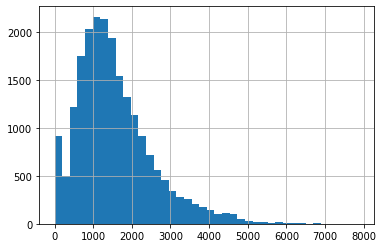

In [61]:
train['Time from Pickup to Arrival'].hist(bins = 40)

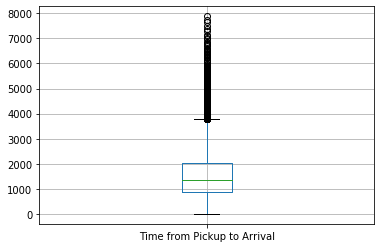

In [51]:
train.boxplot(column=['Time from Pickup to Arrival'])

In [55]:
train.loc[:, ['Time from Pickup to Arrival', 'Distance (KM)']].corr()

,Time from Pickup to Arrival,Distance (KM)
Time from Pickup to Arrival,1.000000,0.580608
Distance (KM),0.580608,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcb85b2810>,
      dtype=object)

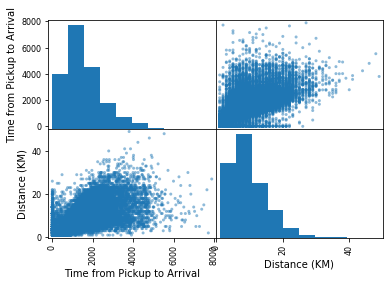

In [57]:
pd.plotting.scatter_matrix(train.loc[:, ['Time from Pickup to Arrival', 'Distance (KM)']])

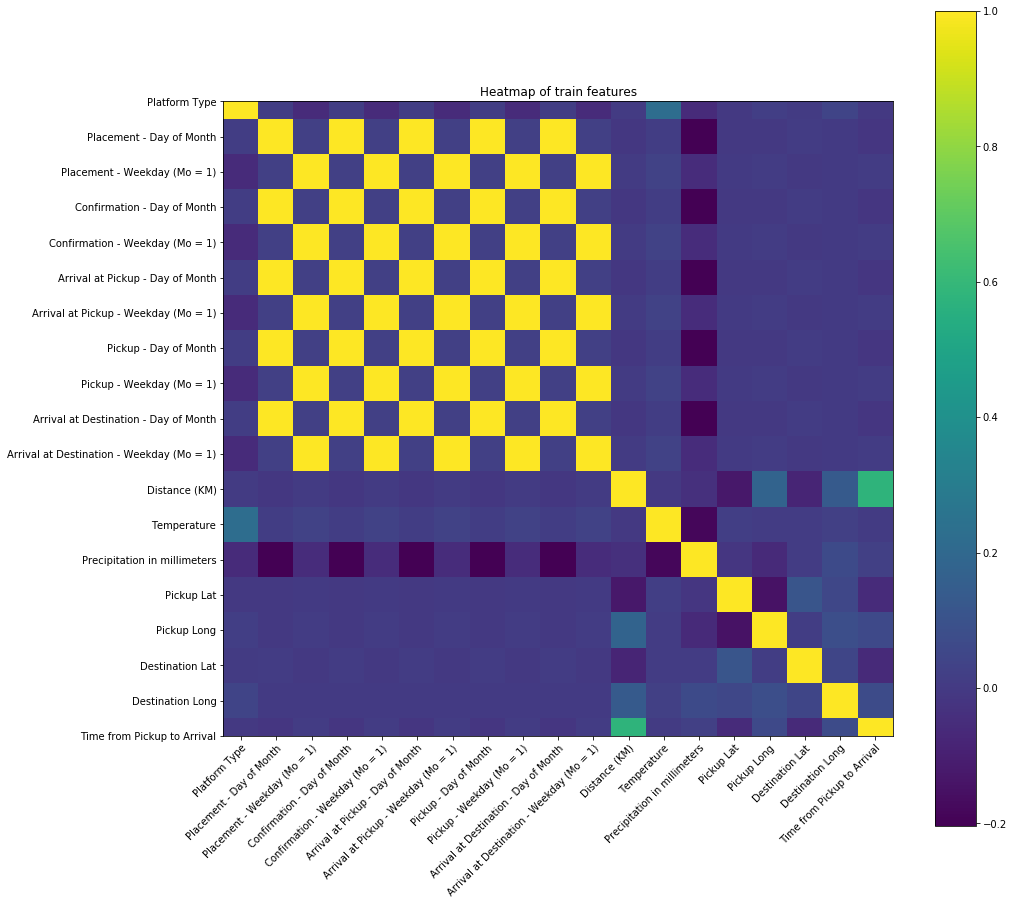

In [20]:
def heatmap(corr):
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = ax.imshow(corr)
    plt.colorbar(heatmap)
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.columns)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # # Loop over data dimensions and create text annotations.
    # for i in range(len(corr.columns)):
    #     for j in range(len(corr.columns)):
    #         text = ax.text(j, i, corr[i, j],
    #                        ha="center", va="center", color="w")

    ax.set_title("Heatmap of train features")
heatmap(train.corr())


In [99]:
corr

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701


In [6]:
train['Arrival at Pickup - Day of Month']

0         9
1        12
2        30
3        15
4        13
         ..
21196    20
21197    13
21198     7
21199     4
21200    26
Name: Arrival at Pickup - Day of Month, Length: 21201, dtype: int64

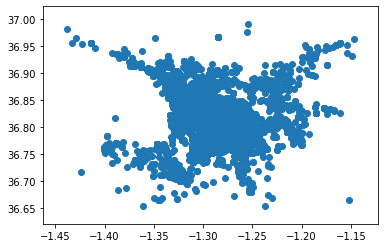

In [11]:
plt.scatter(train['Pickup Lat'], train['Pickup Long'])

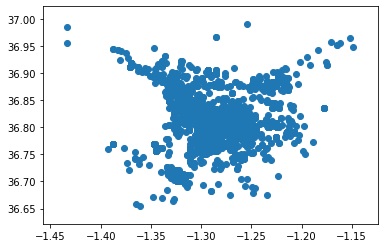

In [12]:
plt.scatter(test['Pickup Lat'], test['Pickup Long'])

In [13]:
precip_data = train[~pd.isna(train['Precipitation in millimeters'])]

In [14]:
precip_data

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
22,Order_No_12412,User_Id_1362,Bike,1,Personal,10,4,7:27:32 PM,10,4,7:27:53 PM,10,4,7:46:17 PM,10,4,7:49:09 PM,10,4,8:13:57 PM,11,18.1,3.9,-1.262755,36.792955,-1.210598,36.810977,Rider_Id_881,1488
51,Order_No_15298,User_Id_3686,Bike,3,Business,9,3,10:11:22 AM,9,3,10:11:27 AM,9,3,10:11:32 AM,9,3,10:17:20 AM,9,3,10:51:09 AM,19,17.6,0.8,-1.255956,36.789867,-1.334474,36.883890,Rider_Id_771,2029
64,Order_No_25240,User_Id_517,Bike,3,Business,4,5,10:08:16 AM,4,5,10:08:43 AM,4,5,10:11:56 AM,4,5,10:17:54 AM,4,5,10:39:30 AM,11,17.3,0.4,-1.316711,36.830156,-1.257422,36.792707,Rider_Id_523,1296
171,Order_No_3572,User_Id_3621,Bike,3,Business,23,2,9:00:15 AM,23,2,9:00:54 AM,23,2,9:12:57 AM,23,2,9:17:07 AM,23,2,9:32:41 AM,4,15.3,7.0,-1.283658,36.788601,-1.283311,36.824024,Rider_Id_571,934
216,Order_No_12098,User_Id_1340,Bike,3,Business,10,4,1:08:16 PM,10,4,1:10:08 PM,10,4,1:31:49 PM,10,4,1:38:36 PM,10,4,1:55:44 PM,9,21.9,1.1,-1.281963,36.754097,-1.270718,36.797971,Rider_Id_749,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21113,Order_No_16809,User_Id_1453,Bike,3,Business,5,2,9:02:17 AM,5,2,9:03:33 AM,5,2,9:09:15 AM,5,2,9:31:11 AM,5,2,9:50:56 AM,8,17.5,4.0,-1.227343,36.799468,-1.259102,36.800577,Rider_Id_865,1185
21123,Order_No_6266,User_Id_3718,Bike,3,Business,9,2,9:58:51 AM,9,2,9:59:17 AM,9,2,10:19:28 AM,9,2,10:21:51 AM,9,2,11:26:48 AM,19,17.6,4.0,-1.265003,36.812624,-1.333994,36.726341,Rider_Id_948,3897
21144,Order_No_1741,User_Id_877,Bike,2,Personal,13,7,7:20:33 PM,13,7,7:20:42 PM,13,7,7:29:56 PM,13,7,7:39:09 PM,13,7,7:46:14 PM,4,19.0,0.3,-1.258077,36.802417,-1.240761,36.780735,Rider_Id_103,425
21159,Order_No_10451,User_Id_2735,Bike,3,Personal,20,4,8:28:38 AM,20,4,8:28:49 AM,20,4,8:49:19 AM,20,4,8:53:04 AM,20,4,10:23:38 AM,21,18.6,0.1,-1.258960,36.801669,-1.343486,36.689546,Rider_Id_395,5434


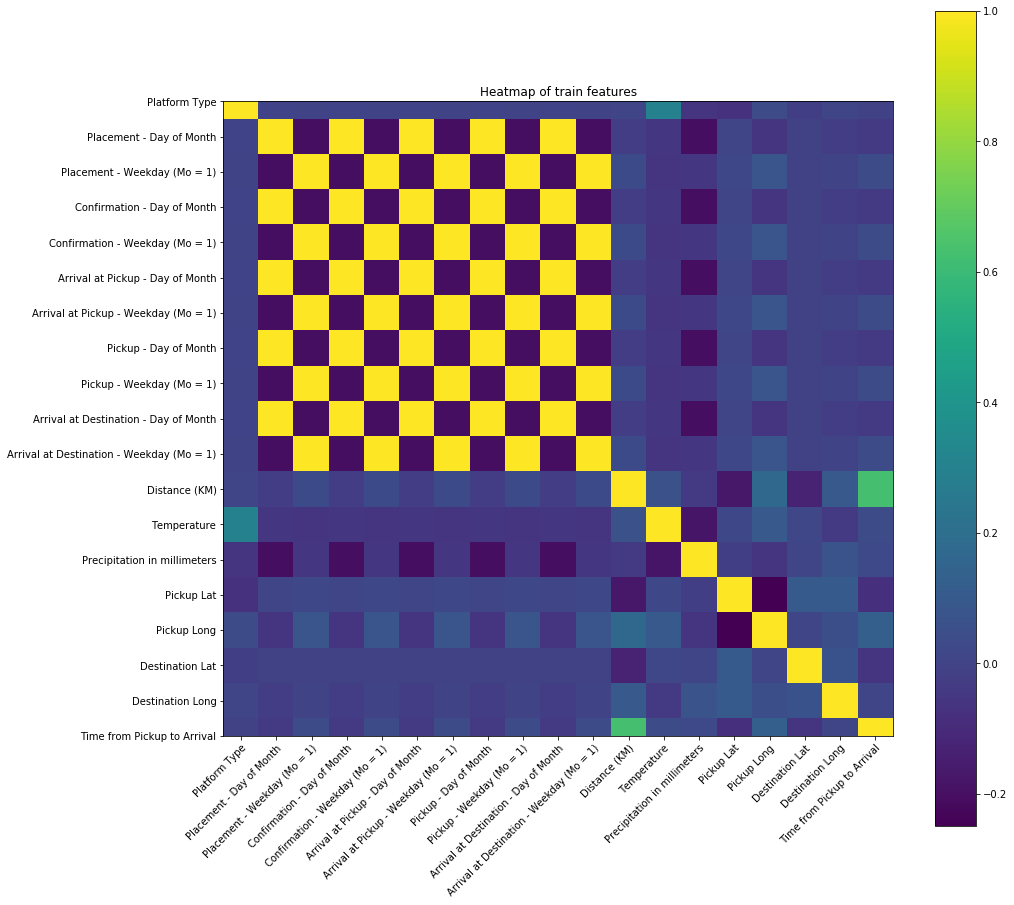

In [21]:
heatmap(precip_data.corr())

In [23]:
precip_data.corr().loc[:,'Precipitation in millimeters']

Platform Type                               -0.055948
Placement - Day of Month                    -0.204143
Placement - Weekday (Mo = 1)                -0.050592
Confirmation - Day of Month                 -0.204143
Confirmation - Weekday (Mo = 1)             -0.050592
Arrival at Pickup - Day of Month            -0.204143
Arrival at Pickup - Weekday (Mo = 1)        -0.050592
Pickup - Day of Month                       -0.204143
Pickup - Weekday (Mo = 1)                   -0.050592
Arrival at Destination - Day of Month       -0.204143
Arrival at Destination - Weekday (Mo = 1)   -0.050592
Distance (KM)                               -0.036237
Temperature                                 -0.181327
Precipitation in millimeters                 1.000000
Pickup Lat                                  -0.015388
Pickup Long                                 -0.060514
Destination Lat                              0.009202
Destination Long                             0.067936
Time from Pickup to Arrival 

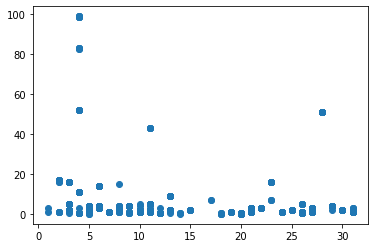

In [24]:
plt.scatter(train['Placement - Day of Month'],train['Precipitation in millimeters'])

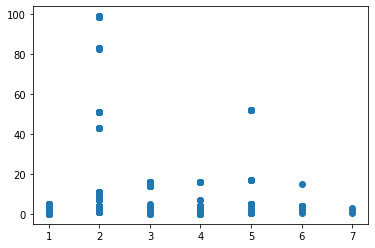

In [25]:
plt.scatter(train['Placement - Weekday (Mo = 1)'],train['Precipitation in millimeters'])

In [30]:
precip_data.groupby(['Placement - Weekday (Mo = 1)'])['Precipitation in millimeters'].size()

Placement - Weekday (Mo = 1)
1    100
2    172
3     96
4    120
5     44
6     17
7      3
Name: Precipitation in millimeters, dtype: int64

In [31]:
precip_data.groupby(['Placement - Day of Month'])['Precipitation in millimeters'].size()

Placement - Day of Month
1      2
2     14
3     38
4     59
5     32
6     38
7     15
8     16
9     21
10    20
11    28
12    17
13    23
14     4
15     6
17     2
18     7
19     7
20    15
21    38
22    13
23    10
24    10
25    11
26    28
27    33
28     9
29    11
30    11
31    14
Name: Precipitation in millimeters, dtype: int64

In [35]:
train[((train['Pickup - Day of Month'] == 15 ) & (train['Pickup - Weekday (Mo = 1)'] == 7))]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
8779,Order_No_13459,User_Id_1929,Bike,3,Personal,15,7,11:23:20 AM,15,7,11:32:54 AM,15,7,11:38:50 AM,15,7,11:59:20 AM,15,7,12:36:54 PM,17,18.1,NaN,-1.202205,36.800012,-1.287918,36.790352,Rider_Id_101,2254
10696,Order_No_28009,User_Id_2062,Bike,1,Personal,15,7,2:43:20 PM,15,7,2:44:04 PM,15,7,3:02:23 PM,15,7,3:06:11 PM,15,7,3:36:11 PM,17,19.7,NaN,-1.287323,36.765857,-1.326737,36.884485,Rider_Id_74,1800
12514,Order_No_24877,User_Id_776,Bike,1,Personal,15,7,10:06:47 AM,15,7,10:40:30 AM,15,7,10:51:41 AM,15,7,10:56:14 AM,15,7,11:26:53 AM,12,18.1,NaN,-1.278967,36.823675,-1.266423,36.745367,Rider_Id_467,1839
13524,Order_No_12014,User_Id_3017,Bike,3,Business,15,7,5:50:55 PM,15,7,5:51:15 PM,15,7,5:59:06 PM,15,7,6:03:14 PM,15,7,6:11:10 PM,3,20.5,NaN,-1.299313,36.783149,-1.290511,36.759114,Rider_Id_45,476
15465,Order_No_12916,User_Id_894,Bike,1,Personal,15,7,5:39:32 PM,15,7,6:03:54 PM,15,7,6:17:01 PM,15,7,6:32:37 PM,15,7,7:03:38 PM,7,20.3,NaN,-1.346168,36.766149,-1.375705,36.758101,Rider_Id_465,1861
15768,Order_No_16281,User_Id_3621,Bike,3,Business,15,7,2:01:16 PM,15,7,2:01:40 PM,15,7,2:14:12 PM,15,7,2:17:02 PM,15,7,3:09:29 PM,8,19.6,NaN,-1.283658,36.788601,-1.306803,36.831527,Rider_Id_722,3147
